In [1]:
from multiinstance.agglomerative_clustering import AgglomerativeClustering
from multiinstance.ward_clustering import WardClustering

In [2]:
AgglomerativeClustering??

In [3]:
from multiinstance.utils import *
from multiinstance.distanceApproaches import *
from multiinstance.data.syntheticData import buildDataset,getBag

import seaborn as sns
import matplotlib.pyplot as plt


import numpy as np

import scipy.stats as ss

from tqdm.notebook import tqdm

In [13]:
AgglomerativeClustering??

KeyboardInterrupt: 

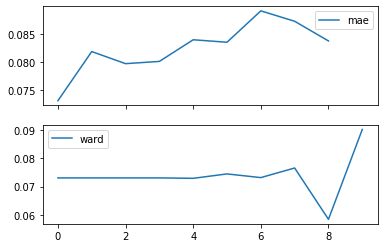

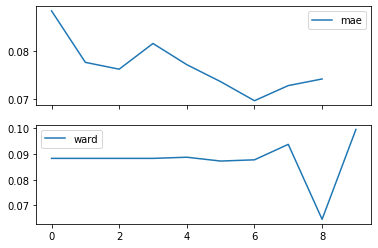

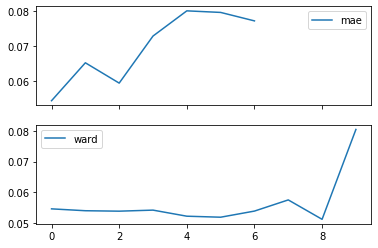

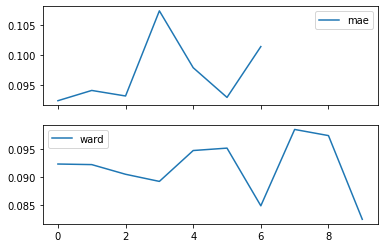

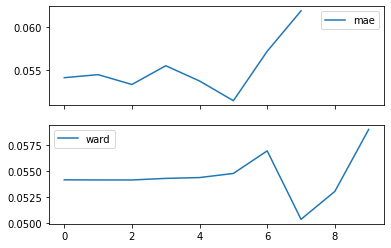

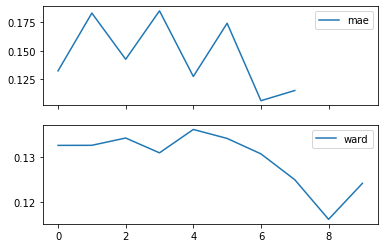

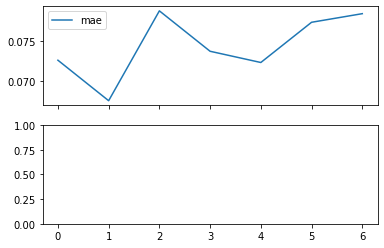

In [14]:
for rep in range(10):
    dsi = buildDataset(10,alphaDistr=lambda: np.random.uniform(.01,.25),
                      nP=5,nU=10)

    dsi = addTransformScores(dsi)

    dsi.alphaHats,dsi.curves = getBagAlphaHats(dsi,numbootstraps=10)

    agg0 = AgglomerativeClustering(dsi, 0.65)


    agg0.cluster()
    fig,ax=plt.subplots(2,1,sharex=True)
    ax[0].plot(agg0.meanAbsErrs,label="mae")
#     ax[1].plot(agg0.bagEstimateVariances,label="var")
    ax[0].legend()
    ward = WardClustering(dsi)
    ward.cluster()

    ward.meanAbsErrs
    ax[1].plot(ward.meanAbsErrs,label="ward")
    ax[1].legend()
    plt.savefig("figs/nb_08/fig_{}.pdf".format(rep),
                format="pdf")